<a href="https://colab.research.google.com/github/shaj1/personal/blob/master/Peer_Shajudeen_DC1A_videogame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Video game sales data challenge**

# 1. Executive Summary

A major video production company has enlisted our expertise inconducting market research. We have video game sales data from the last 30 years. We have proposed the following recommendations:



1.   Japan is an untapped market for a variety of genres. Most of the japanese market is dominated by Nintendo especially for role-playing games. However, Shooter games have a very low market interest from the Japanese public presumably due to Nintendo's lack of offering in that space. We will have to focus on garnering interest from the japanese public for the Shooter genre by leveraging cultural gaming aspects from Nintendo. The Sports genre for Japan is also being absorved by Nintendo and Konami. Since Electronic Arts takes up most of the world sports genre market share, there may be some merit to investigating this space for Japan. 

2.   The Gaming market is losing a large portion of European Union in the role-playing game space. We could potentially develop better Role-playing games for the EU public. 

3. The most trending genre in the last 5 years has been Sports in every region except Japan and Electronic Arts has been the reigning king in that genre. Japan is still going strong on it's Role playing genre along with the Action genre which has been gaining a lot of traction.



In [2]:
# Import libraries for data analysis
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('drive/My Drive/videoGameSales/vgsales.csv')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
df.dropna(inplace=True)
#df=df[df!=0].dropna()

# 2. Exploratory Data Analysis

By looking at the measures of tendency in our data, we observe zeros in 25% of the individual region sales data. This is due to the data being in the millions and truncating anything beyond 3 decimal places to zero. This is unfortunate as we lose a lot of the trending data.  

In [26]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00
mean,8290.19,2006.41,0.27,0.15,0.08,0.05,0.54
std,4792.65,5.83,0.82,0.51,0.31,0.19,1.57
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4132.50,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8292.00,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12439.50,2010.00,0.24,0.11,0.04,0.04,0.48
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


A time series evolution of total sales in each of the individual regions over time (North America, Europe, Japan and Others). It shows an upward trend leading up to the 2010s. And then a downward spiral ever since. Notice that Japan is not following this trend and the sales seem to be relatively steady. This shows some monetary potential in this region.  

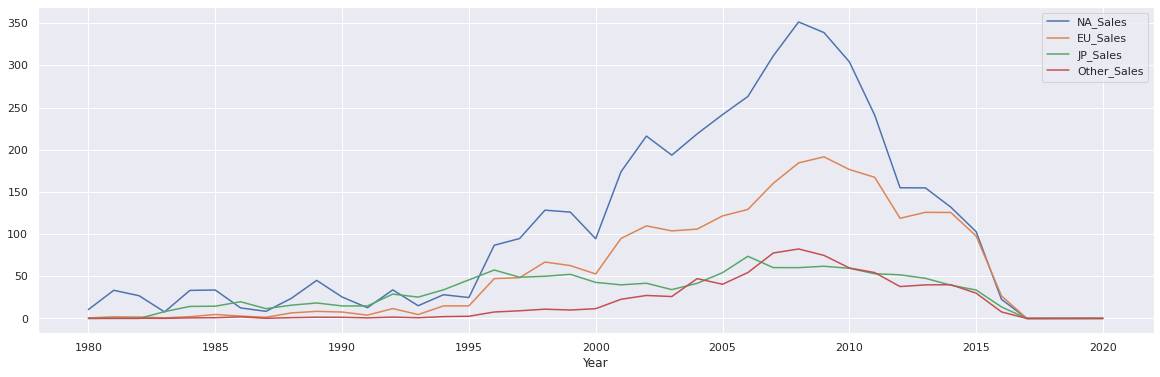

In [266]:
df[[x for x in df.columns if 'NA_Sales' in x or 'EU_Sales' in x or 'JP_Sales' in x or 'Other_Sales' in x] + 
   ['Year']].groupby('Year').sum().plot();

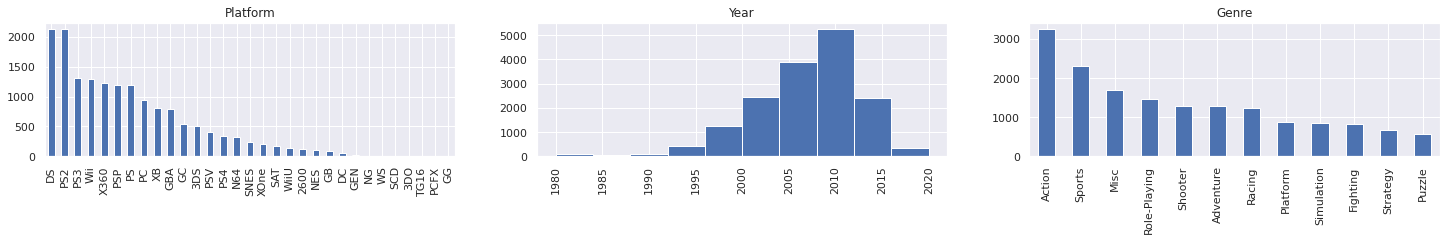

In [26]:
df1 = df
fig = plt.figure(figsize=(25, 15))
cols = 3
rows = np.ceil(float(df1.shape[1]) / cols)

# Loop over the first 5 columns excluding converted
for i, column in enumerate(df1.iloc[:,2:5].columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df1.dtypes[column] == np.object:
        df1[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df1[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

## 2.1 Market share in each Genre

Below you will see a division of the market by each publisher for the last thirty years. Clearly, Nintendo and Electronic Arts together have claimed a third of this market.




In [267]:
perc_sales_by_publisher = 100*df['Global_Sales'].groupby(df['Publisher']).sum()/df['Global_Sales'].sum()
print(perc_sales_by_publisher.sort_values(ascending=False).head(10))

Publisher
Nintendo                        20.25
Electronic Arts                 12.41
Activision                       8.19
Sony Computer Entertainment      6.89
Ubisoft                          5.37
Take-Two Interactive             4.53
THQ                              3.86
Konami Digital Entertainment     3.16
Sega                             3.07
Namco Bandai Games               2.88
Name: Global_Sales, dtype: float64


In the following figure, the North America market has dominated every Genre but Role-playing which is taken up by the Japanese market. There is also not much comparitively in terms of sales in the Japanese market in other genres.

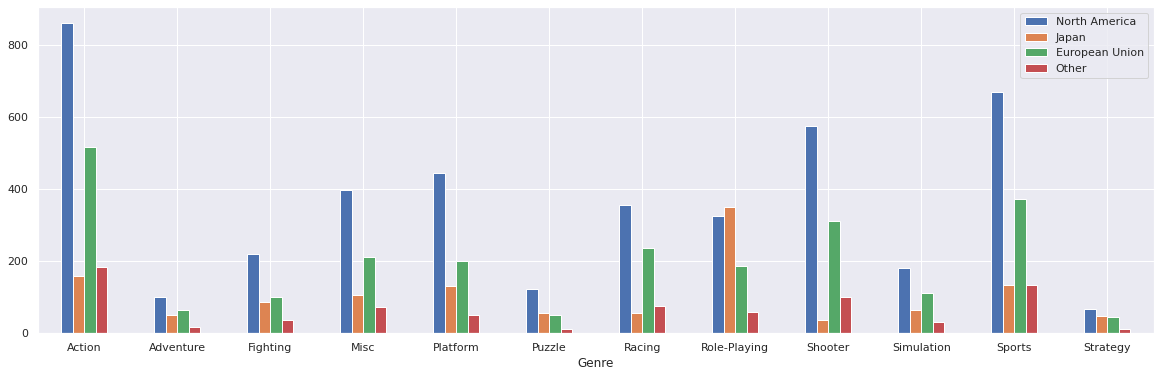

In [112]:
#other_genre = platform_genre_sales.sum()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,6)
genre_sales = pd.DataFrame({'North America': na_genre,
                   'Japan': jp_genre, 'European Union': eu_genre, 'Other': other_genre})                
ax = genre_sales.plot.bar(rot=0)

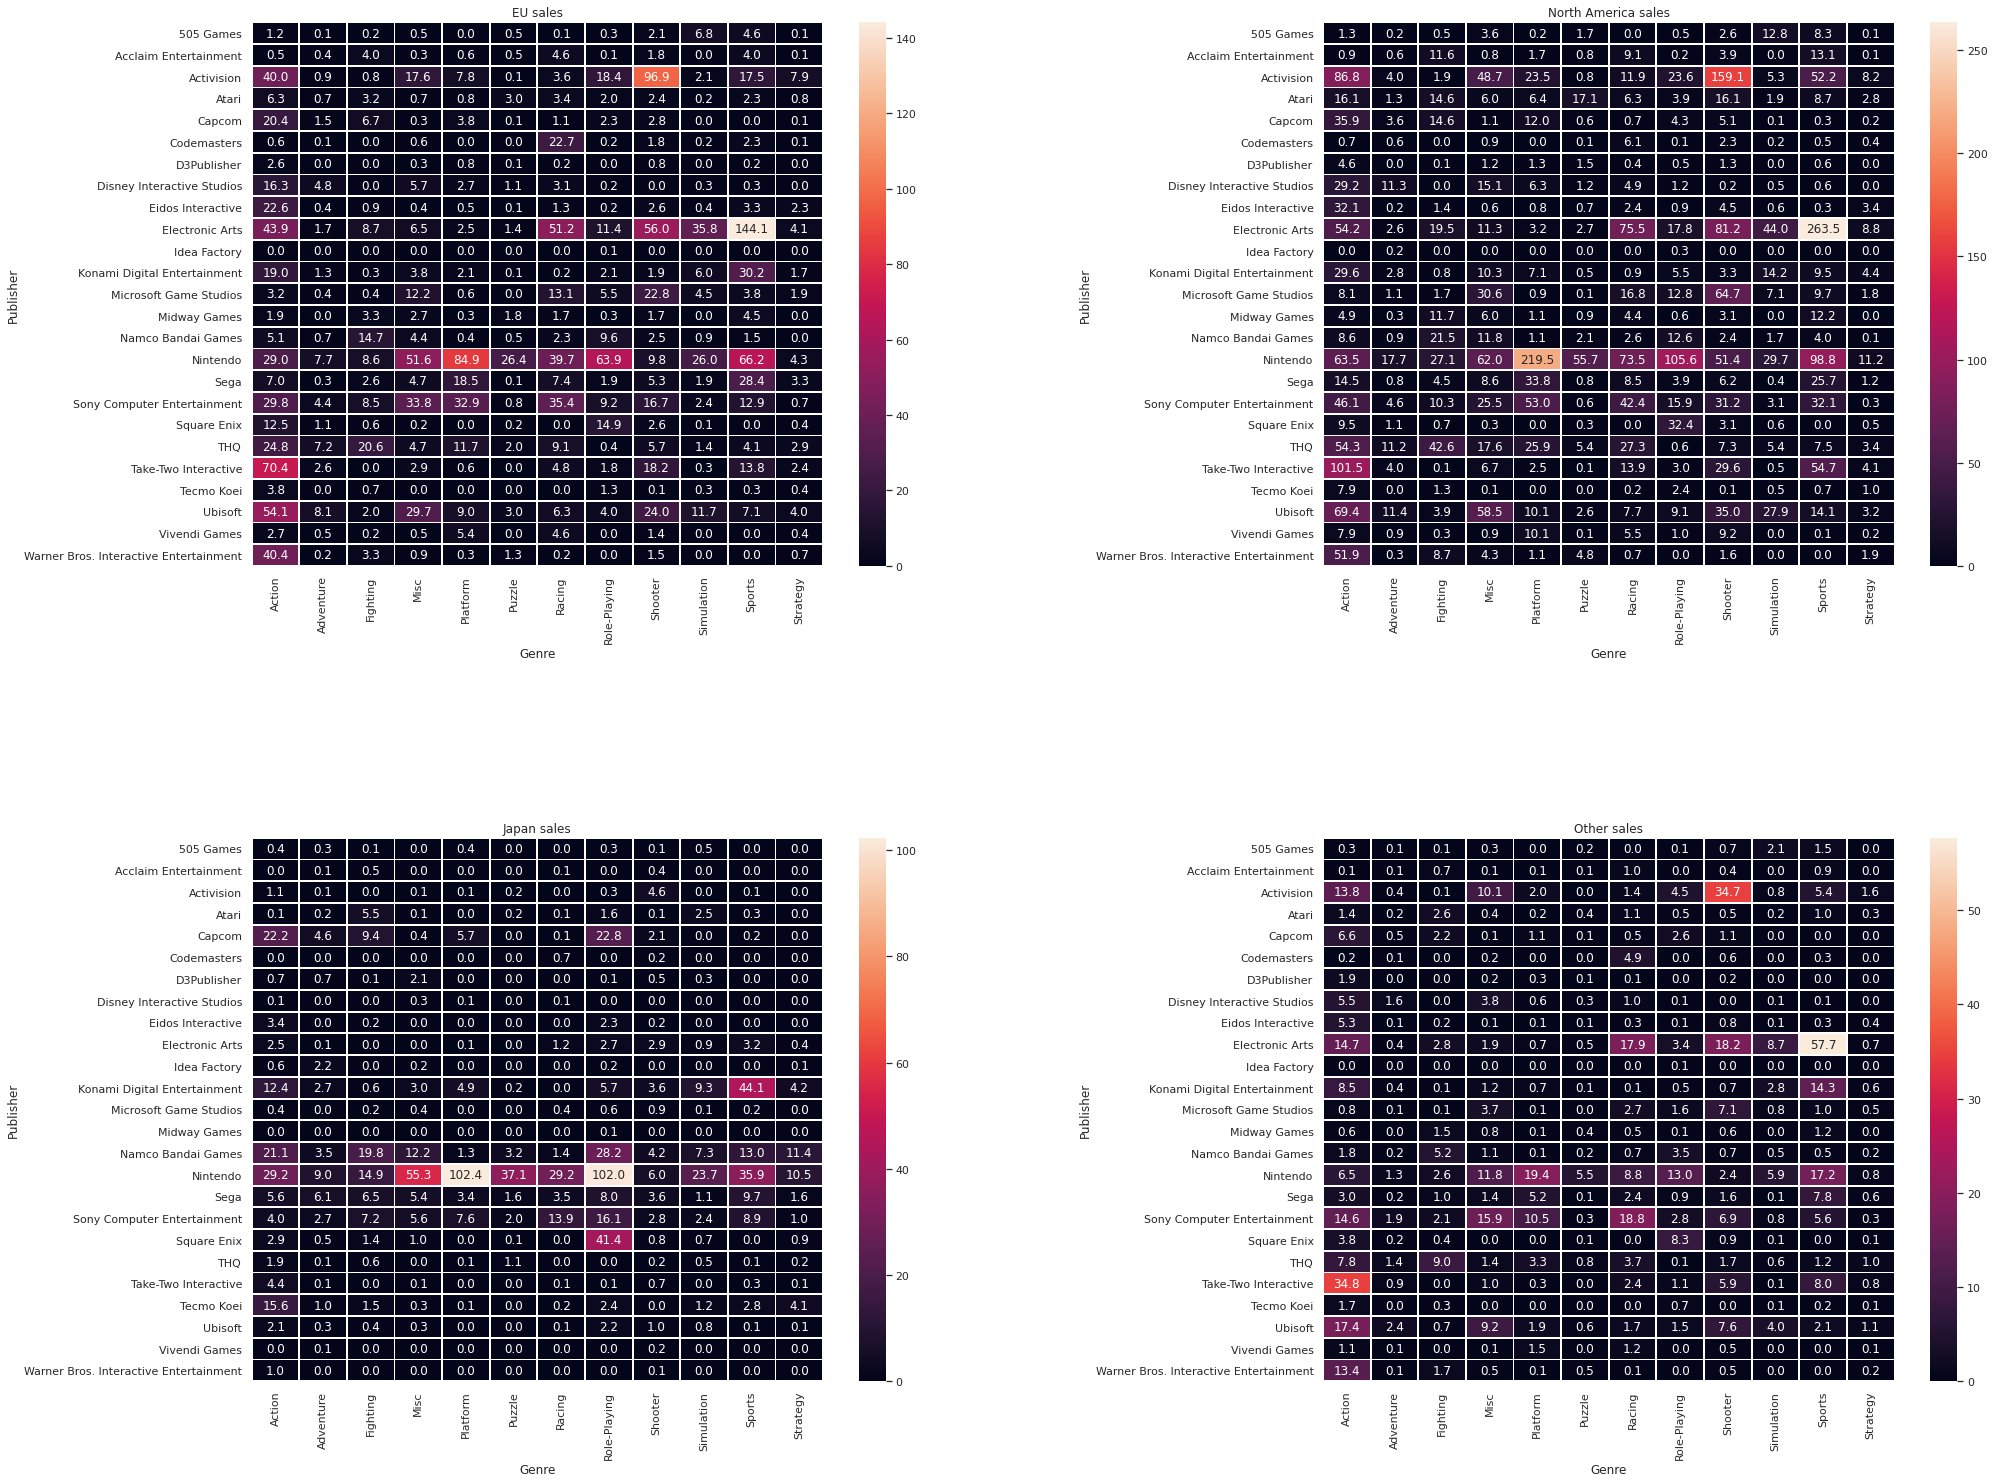

In [258]:
top_publishers = df['Publisher'].value_counts().sort_values(ascending=False).head(25).index.values
df2 = df.copy()
df2 = df2[df2['Publisher'].apply(lambda x: x in list(top_publishers))]
#df2.dropna(inplace=True)
#df2 = df2.groupby('Publisher').filter(lambda x : x in top_publishers)

platform_genre_sales_eu = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='EU_Sales', 
                        aggfunc=sum).fillna(0)
platform_genre_sales_na = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='NA_Sales', 
                        aggfunc=sum).fillna(0)
platform_genre_sales_jp = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='JP_Sales', 
                        aggfunc=sum).fillna(0)
platform_genre_sales_other = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='Other_Sales', 
                        aggfunc=sum).fillna(0)


#eu_genre = platform_genre_sales.sum()
#f, (ax1, ax2) = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(32, 25))

#f, ax1 = plt.subplots(figsize=(15,8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('EU sales')
ax1 = sns.heatmap(platform_genre_sales_eu, annot=True, fmt=".1f", linewidths=.8)
#f, ax2 = plt.subplots(figsize=(15, 8))
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('North America sales')
ax2 = sns.heatmap(platform_genre_sales_na, annot=True, fmt=".1f", linewidths=.8)
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Japan sales')
ax3 = sns.heatmap(platform_genre_sales_jp, annot=True, fmt=".1f", linewidths=.8)
plt.subplots_adjust(hspace=0.7, wspace=0.3)
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Other sales')
ax4 = sns.heatmap(platform_genre_sales_other, annot=True, fmt=".1f", linewidths=.8)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

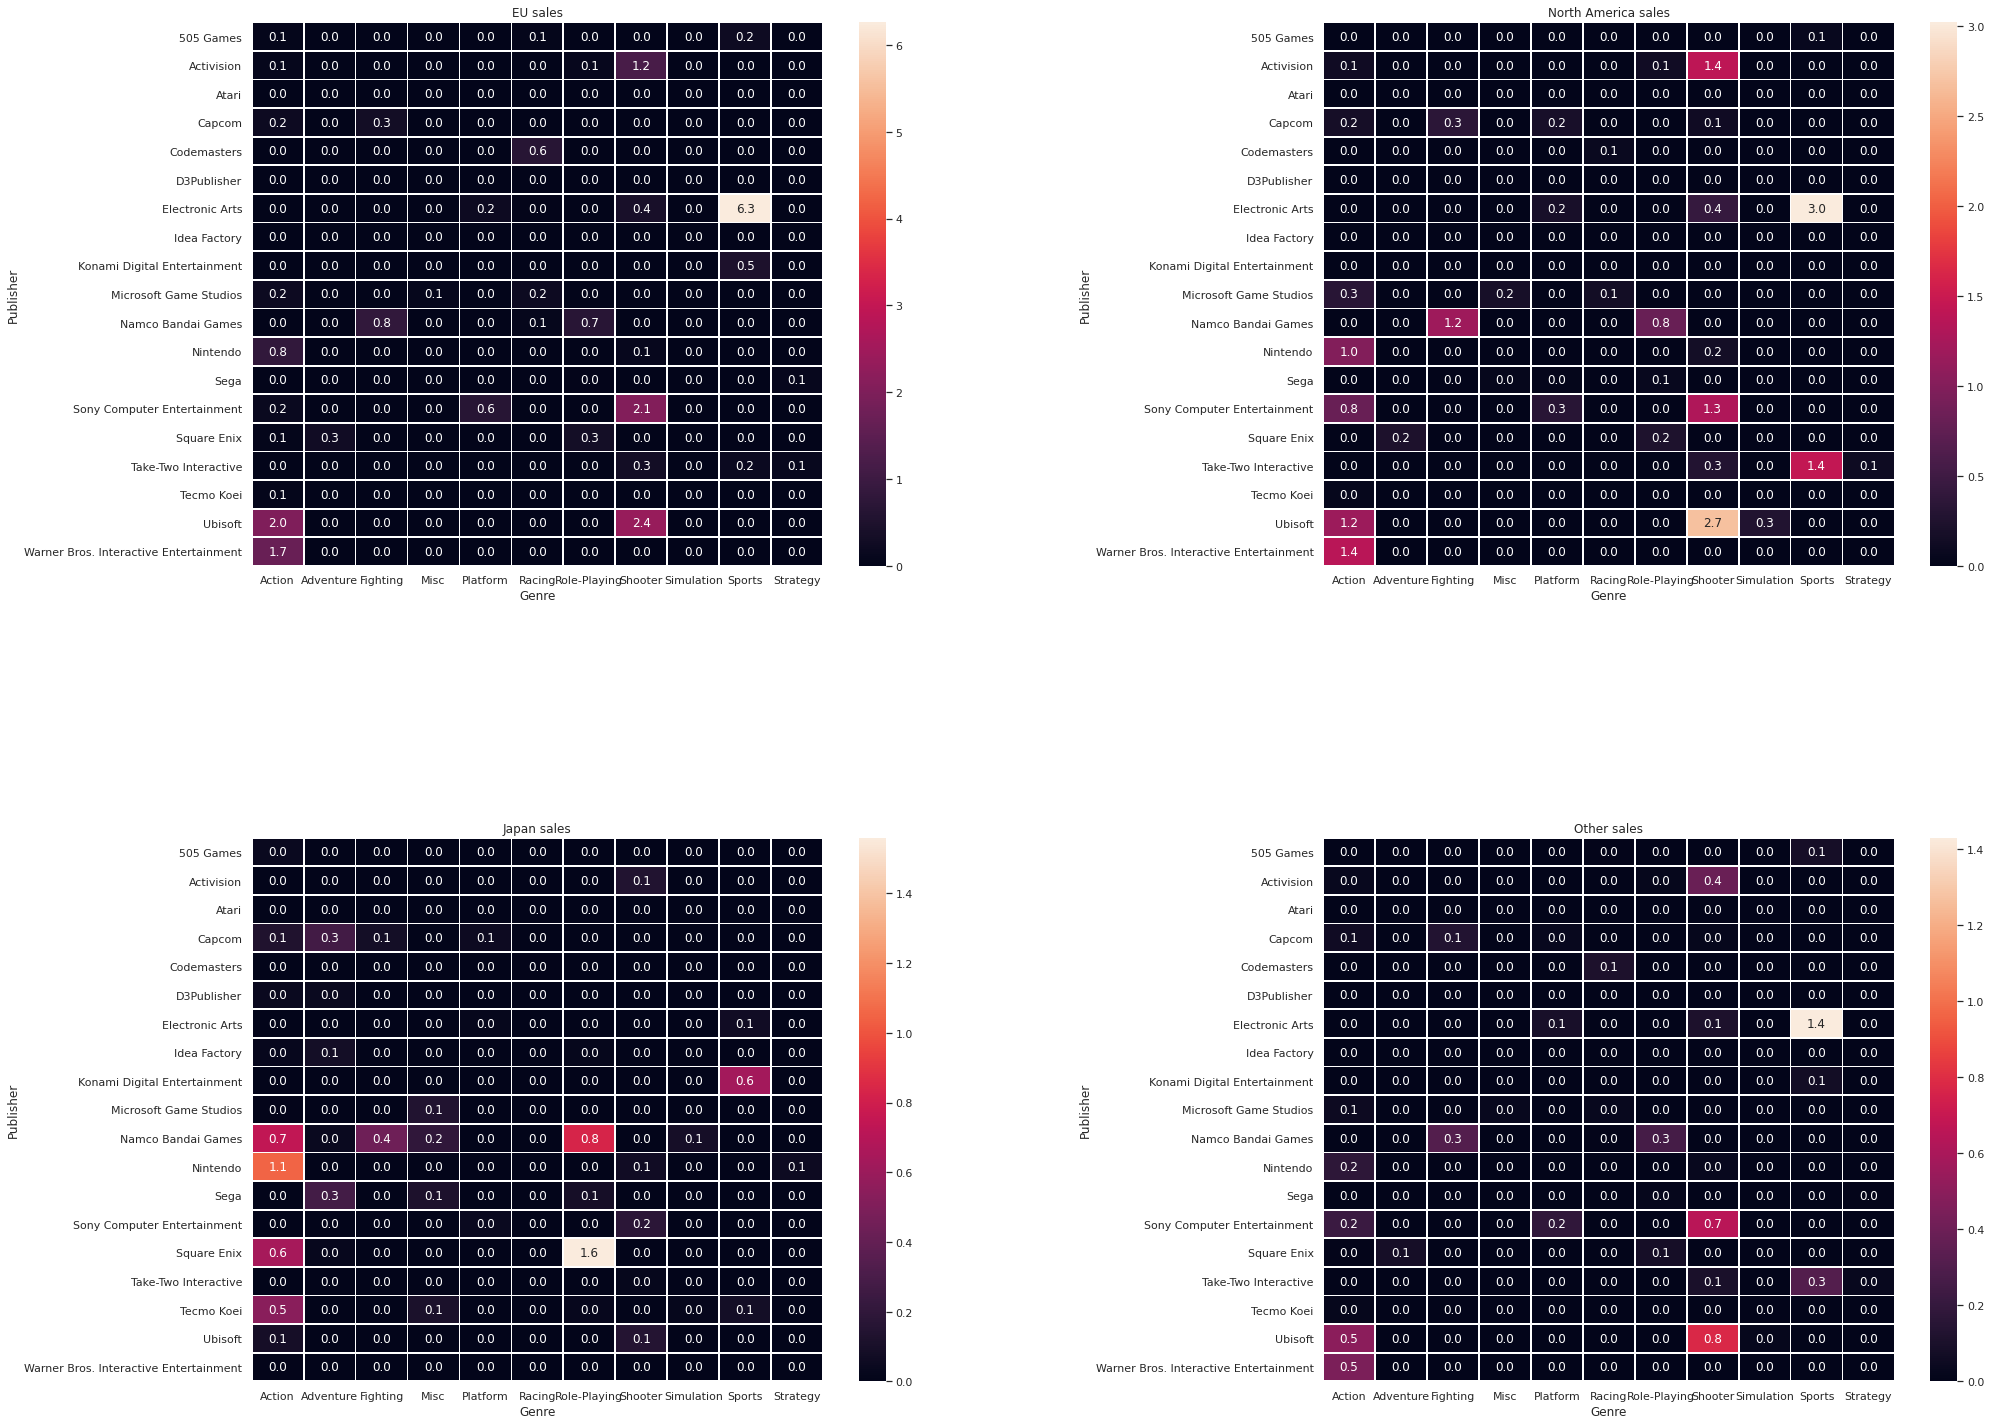

In [251]:
top_publishers = df1['Publisher'].value_counts().sort_values(ascending=False).head(25).index.values
df3 = df.copy()
df3 = df3[df3['Publisher'].apply(lambda x: x in list(top_publishers))]
df2 = df3[df3['Year'] > 2015]
#df2.dropna(inplace=True)
#df2 = df2.groupby('Publisher').filter(lambda x : x in top_publishers)

platform_genre_sales_eu = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='EU_Sales', 
                        aggfunc=sum).fillna(0)
platform_genre_sales_na = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='NA_Sales', 
                        aggfunc=sum).fillna(0)
platform_genre_sales_jp = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='JP_Sales', 
                        aggfunc=sum).fillna(0)
platform_genre_sales_other = df2.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='Other_Sales', 
                        aggfunc=sum).fillna(0)


#eu_genre = platform_genre_sales.sum()
#f, (ax1, ax2) = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(32, 25))

#f, ax1 = plt.subplots(figsize=(15,8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('EU sales')
ax1 = sns.heatmap(platform_genre_sales_eu, annot=True, fmt=".1f", linewidths=.8)
#f, ax2 = plt.subplots(figsize=(15, 8))
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('North America sales')
ax2 = sns.heatmap(platform_genre_sales_na, annot=True, fmt=".1f", linewidths=.8)
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Japan sales')
ax3 = sns.heatmap(platform_genre_sales_jp, annot=True, fmt=".1f", linewidths=.8)
plt.subplots_adjust(hspace=0.7, wspace=0.3)
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Other sales')
ax4 = sns.heatmap(platform_genre_sales_other, annot=True, fmt=".1f", linewidths=.8)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [261]:
top_publishers

array(['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft',
       'Konami Digital Entertainment', 'THQ', 'Nintendo',
       'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive'],
      dtype=object)

Text(0.5, 1.0, 'Global sales')

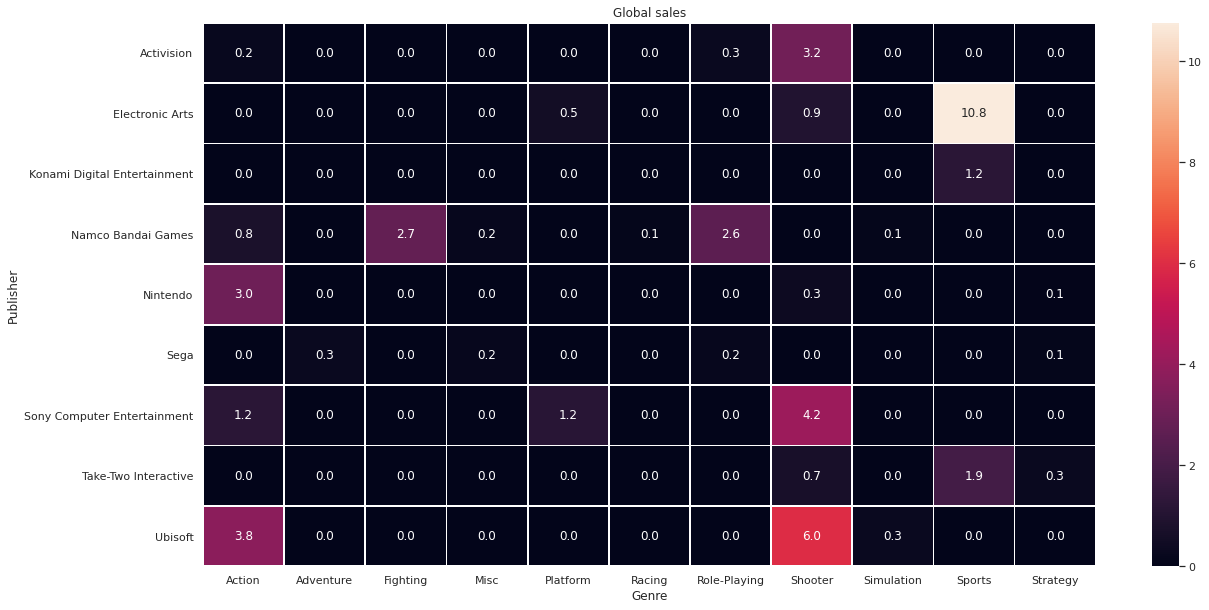

In [265]:
df_global = df.copy()
top_publishers = df['Publisher'].value_counts().sort_values(ascending=False).head(10).index.values
df3 = df.copy()
df3 = df3[df3['Publisher'].apply(lambda x: x in list(top_publishers))]
df_global = df3[df3['Year'] > 2015]

platform_genre_sales_global = df_global.pivot_table(
                        index='Publisher', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0)

fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(platform_genre_sales_global, annot=True, fmt=".1f", linewidths=.8)
ax.set_title('Global sales')


In [34]:
df1 = df.groupby('Publisher').filter(lambda x : len(x)>100)
df1['Publisher'].value_counts()

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [4]:
df.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [6]:
df[df['Name'] == 'Need for Speed: Most Wanted']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


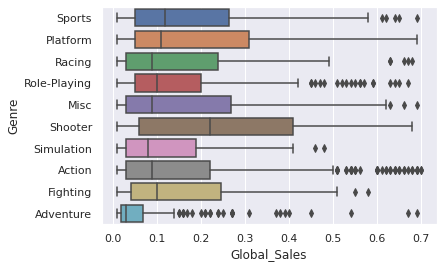

In [70]:
df1 = df.copy()
df1.loc[df1['Global_Sales'] > 0.7, 'Global_Sales'] = float('NaN')
df1.loc[df1['Year'] < 2013, 'Global_Sales'] = float('NaN')
top_platforms = df1['Genre'].value_counts().sort_values(ascending=False).head(10).index.values
sns.boxplot(y="Genre", x="Global_Sales", 
            data=df1[df1['Genre'].isin(top_platforms)], orient="h");

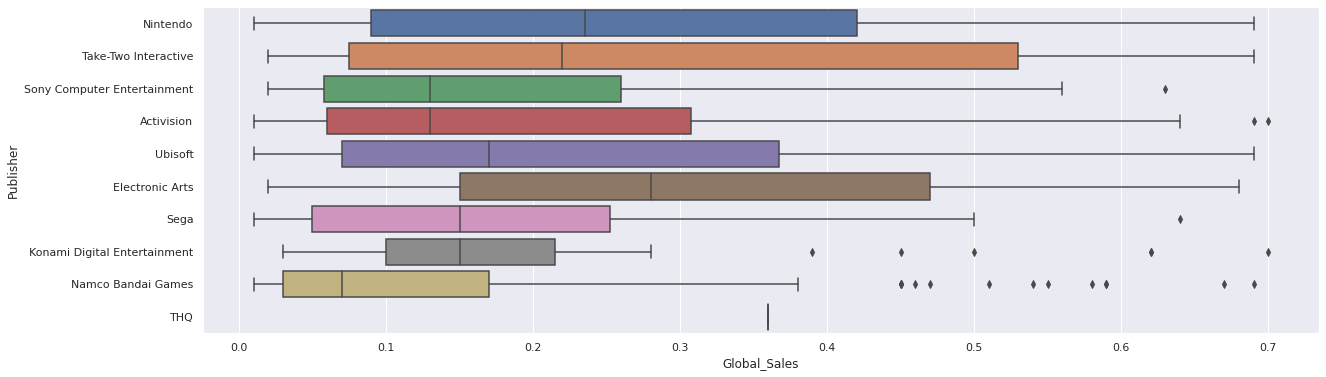

In [233]:
df1 = df.copy()
df1.loc[df1['Global_Sales'] > 0.7, 'Global_Sales'] = float('NaN')
df1.loc[df1['Year'] < 2013, 'Global_Sales'] = float('NaN')
top_platforms = df1['Publisher'].value_counts().sort_values(ascending=False).head(10).index.values
sns.boxplot(y="Publisher", x="Global_Sales", 
            data=df1[df1['Publisher'].isin(top_platforms)], orient="h");

In [241]:
data_dummies = df.copy()
# choose categorical and continuous features from data

data_dummies = df.copy()
data_dummies.drop(['Global_Sales'],axis=1,inplace=True)
data_dummies.drop(['NA_Sales'],axis=1,inplace=True)
data_dummies.drop(['JP_Sales'],axis=1,inplace=True)
data_dummies.drop(['EU_Sales'],axis=1,inplace=True)
data_dummies.drop(['Other_Sales'],axis=1,inplace=True)
data_dummies.drop(['Name'],axis=1,inplace=True)
#data_dummies.drop(['Publisher'],axis=1,inplace=True)
data_dummies.drop(['Rank'],axis=1,inplace=True)


#data_dummies = data_dummies[['total_pages_visited']]

#data_dummies['new_user'] = data_dummies['new_user'].astype(object)
categorical_columns = [c for c in data_dummies.columns 
                       if data_dummies[c].dtype.name == 'object']
numerical_columns = [c for c in data_dummies.columns 
                     if data_dummies[c].dtype.name != 'object']

print('categorical:', categorical_columns)
print('numerical:', numerical_columns)

y = df['Global_Sales']

if numerical_columns != [] and categorical_columns != []:
  data_new = pd.concat([data_dummies[numerical_columns],
    pd.get_dummies(data_dummies[categorical_columns])], axis=1)
else:
  data_new = data_dummies

categorical: ['Platform', 'Genre', 'Publisher']
numerical: ['Year']


In [242]:
from sklearn.model_selection import cross_val_score, train_test_split


X_train, X_holdout, y_train, y_holdout = train_test_split(data_new, y, test_size=0.3, 
                                                          random_state=17)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

In [243]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_holdout)
reg_tree_pred_train = reg_tree.predict(X_train)

print("Mean squared error (train): %.3f" % mean_squared_error(y_train, reg_tree_pred_train))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, reg_tree_pred))

Mean squared error (train): 1.603
Mean squared error (test): 2.833


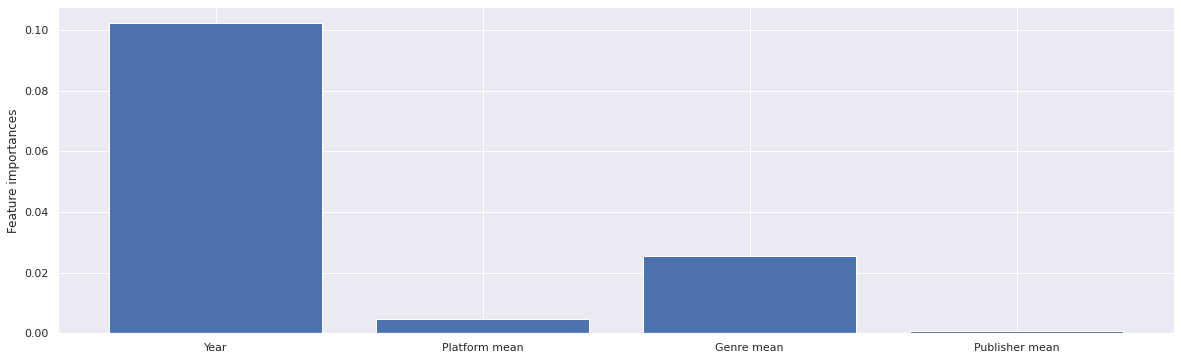

In [244]:
from matplotlib import pyplot

importance = reg_tree.feature_importances_
# summarize feature importance
platform_sum = 0
platform_num = 0
genre_sum = 0
genre_num = 0
pub_sum = 0
pub_num = 0
game_sum = 0
game_num = 0

for i,v in enumerate(importance):
  if 'Platform' in data_new.columns[i]:
    platform_sum += v
    platform_num += 1
  elif 'Genre' in data_new.columns[i]:
    genre_sum += v
    genre_num += 1
  elif 'Publisher' in data_new.columns[i]:
    pub_sum += v
    pub_num += 1
  else:
    imp = v
	#print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(4)], np.array([imp, platform_sum/platform_num, genre_sum/genre_num, pub_sum/pub_num]))
pyplot.xticks(np.arange(4), ['Year', 'Platform mean', 'Genre mean', 'Publisher mean'])
pyplot.ylabel('Feature importances') 
pyplot.show()

In [221]:
!git init

Initialized empty Git repository in /content/.git/


In [223]:
!git config — global user.name shaj1


usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [224]:
!git add -A


error: open("drive/My Drive/Asymmetry Exp.gsheet"): Operation not supported
error: unable to index file drive/My Drive/Asymmetry Exp.gsheet
fatal: adding files failed


In [ ]:
! git add 